# Fashion MNIST Classification using Keras and Tensorflow
This project was developed during the course of Alura called ["Deep Leanirg parte 1: Keras"](https://cursos.alura.com.br/course/deep-learning-introducao-com-keras) by Cássia Sampaio.

## Some repositories of images
* [Kaggle](https://www.kaggle.com/datasets)
* [AWS](https://registry.opendata.aws/)
* [Google](https://storage.googleapis.com/openimages/web/index.html) 

## Author
* Gabriel dos Santos Lima - [@gabrielSantosLima](https://github.com/gabrielSantosLima)

## Step 0: Importing libraries

In [68]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

## Step 1: Importing the dataset

In [69]:
dataset = keras.datasets.fashion_mnist.load_data()

## Step 2: Data exploration

In [70]:
((x_train, y_train), (x_test, y_test)) = dataset

Is there how many examples in the dataset? What is the shape of an image?

In [71]:
print(f"Quantidade de imagens para treino: {len(x_train)}")
print(f"Formato: {x_train.shape}")
print(f"Quantidade de imagens para teste: {len(x_test)}")
print(f"Formato: {x_test.shape}")

Quantidade de imagens para treino: 60000
Formato: (60000, 28, 28)
Quantidade de imagens para teste: 10000
Formato: (10000, 28, 28)


Plotting a sample

In [72]:
labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

In [73]:
def plot_images(n):
    plt.subplots_adjust( wspace=1)
    for i in range(n):
        plt.subplot(int(np.ceil(n/5)), 5, i + 1)
        plt.imshow(x_train[i])
        plt.title(f"{labels[y_train[i]]}")
        plt.axis('off')

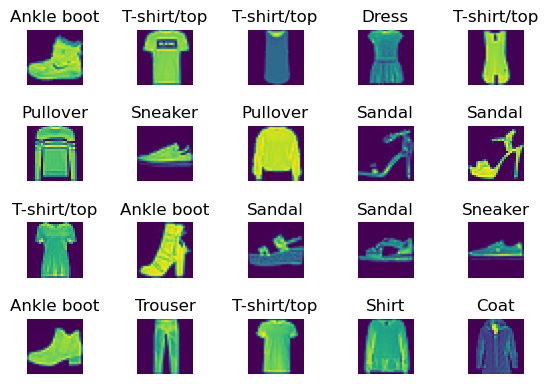

In [74]:
plot_images(20)

## Step 3: Training

In [100]:
x_train_norm = x_train / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [116]:
model.fit(x_train_norm, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2176 - accuracy: 0.9180 - val_loss: 0.2185 - val_accuracy: 0.9202
Epoch 2/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2079 - accuracy: 0.9216 - val_loss: 0.2345 - val_accuracy: 0.9133
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2004 - accuracy: 0.9265 - val_loss: 0.2219 - val_accuracy: 0.9170
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1939 - accuracy: 0.9273 - val_loss: 0.2479 - val_accuracy: 0.9124
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1861 - accuracy: 0.9309 - val_loss: 0.2301 - val_accuracy: 0.9165
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1836 - accuracy: 0.9308 - val_loss: 0.2349 - val_accuracy: 0.9132
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1753 - accuracy: 0.9345 - val_loss: 0.2447 - val_accuracy:

## Step 4: Evaluating the model

In [119]:
y_pred = model.predict(x_test)

print(f"y_pred = {np.argmax(y_pred[0])}")
print(f"y_true = {np.argmax(y_test[0])}")

y_pred = 9
y_true = 9


In [123]:
loss_test, accuracy_test = model.evaluate(x_test, y_test)
print(f"Perda do teste = {loss_test:.2f}")
print(f"Acurácia do teste = {accuracy_test:.2f}")

ValueError: in user code:

    c:\Users\Gabriel\miniconda3\envs\alura\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 test_function  *
        return step_function(self, iterator)
    c:\Users\Gabriel\miniconda3\envs\alura\lib\site-packages\tensorflow\python\keras\engine\training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\Users\Gabriel\miniconda3\envs\alura\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\Users\Gabriel\miniconda3\envs\alura\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\Users\Gabriel\miniconda3\envs\alura\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\Users\Gabriel\miniconda3\envs\alura\lib\site-packages\tensorflow\python\keras\engine\training.py:1208 run_step  **
        outputs = model.test_step(data)
    c:\Users\Gabriel\miniconda3\envs\alura\lib\site-packages\tensorflow\python\keras\engine\training.py:1179 test_step
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    c:\Users\Gabriel\miniconda3\envs\alura\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:409 update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    c:\Users\Gabriel\miniconda3\envs\alura\lib\site-packages\tensorflow\python\keras\utils\metrics_utils.py:90 decorated
        update_op = update_state_fn(*args, **kwargs)
    c:\Users\Gabriel\miniconda3\envs\alura\lib\site-packages\tensorflow\python\keras\metrics.py:176 update_state_fn
        return ag_update_state(*args, **kwargs)
    c:\Users\Gabriel\miniconda3\envs\alura\lib\site-packages\tensorflow\python\keras\metrics.py:612 update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    c:\Users\Gabriel\miniconda3\envs\alura\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    c:\Users\Gabriel\miniconda3\envs\alura\lib\site-packages\tensorflow\python\keras\metrics.py:3301 sparse_categorical_accuracy
        y_true = array_ops.squeeze(y_true, [-1])
    c:\Users\Gabriel\miniconda3\envs\alura\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    c:\Users\Gabriel\miniconda3\envs\alura\lib\site-packages\tensorflow\python\util\deprecation.py:507 new_func
        return func(*args, **kwargs)
    c:\Users\Gabriel\miniconda3\envs\alura\lib\site-packages\tensorflow\python\ops\array_ops.py:4259 squeeze
        return gen_array_ops.squeeze(input, axis, name)
    c:\Users\Gabriel\miniconda3\envs\alura\lib\site-packages\tensorflow\python\ops\gen_array_ops.py:10042 squeeze
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    c:\Users\Gabriel\miniconda3\envs\alura\lib\site-packages\tensorflow\python\framework\op_def_library.py:742 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    c:\Users\Gabriel\miniconda3\envs\alura\lib\site-packages\tensorflow\python\framework\func_graph.py:591 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    c:\Users\Gabriel\miniconda3\envs\alura\lib\site-packages\tensorflow\python\framework\ops.py:3477 _create_op_internal
        ret = Operation(
    c:\Users\Gabriel\miniconda3\envs\alura\lib\site-packages\tensorflow\python\framework\ops.py:1974 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    c:\Users\Gabriel\miniconda3\envs\alura\lib\site-packages\tensorflow\python\framework\ops.py:1815 _create_c_op
        raise ValueError(str(e))

    ValueError: Can not squeeze dim[1], expected a dimension of 1, got 10 for '{{node Squeeze}} = Squeeze[T=DT_FLOAT, squeeze_dims=[-1]](IteratorGetNext:1)' with input shapes: [?,10].
